In [57]:
from dataloaders import get_dataset, get_dataloaders
import configue
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
config = configue.load("config.yaml")
dataset = get_dataset(config)
labels_name = ["Disturbed Galaxies", "Merging Galaxies", "Round Smooth Galaxies", "In-between Round Smooth Galaxies", "Cigar Shaped Smooth Galaxies", "Barred Spiral Galaxies", "Unbarred Tight Spiral Galaxies", "Unbarred Loose Spiral Galaxies", "Edge-on Galaxies without Bulge", "Edge-on Galaxies with Bulge"]

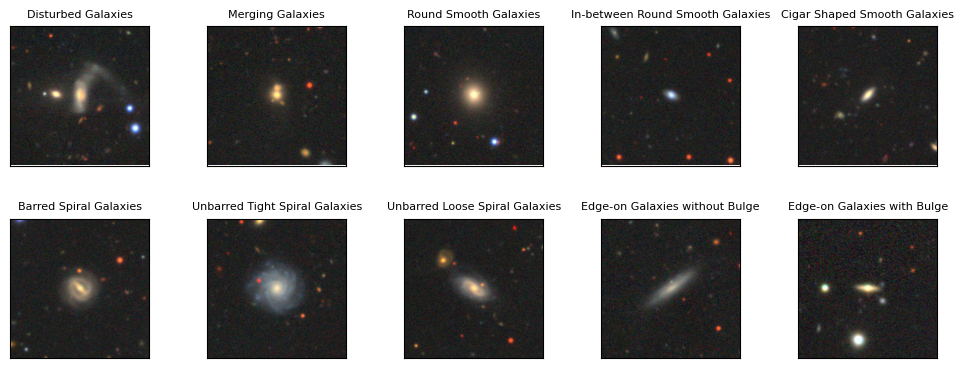

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
plt.tight_layout()
for i in range(10):
    ax = axes[i//5][i%5]
    image_index = dataset.labels.tolist().index(i)
    image, _ = dataset[image_index]
    image = image.numpy()
    image = np.moveaxis(image, 0, -1)
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(labels_name[i], fontsize=8)


Text(0.5, 1.0, 'Répartition des images selon les classes')

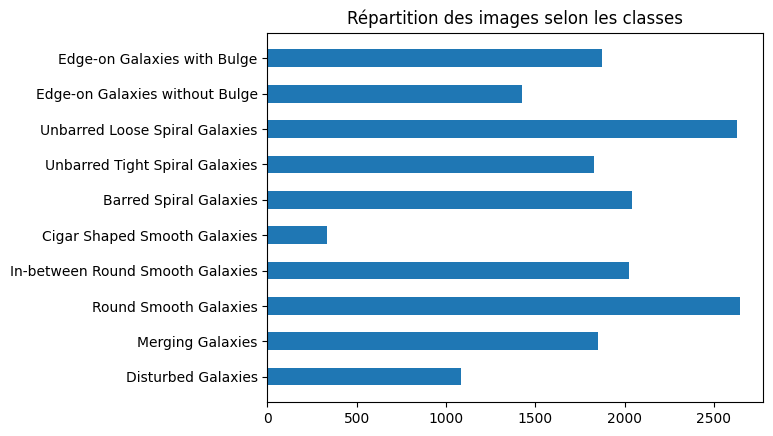

In [51]:
n, _ = np.histogram(dataset.labels, bins=10)
plt.barh([i for i in range(10)], width = n, height = 0.5, tick_label=labels_name)
plt.title("Répartition des images selon les classes")

In [56]:
train_set, val_set, test_set, _, _, _ = get_dataloaders(config, dataset, also_get_datasets=True)

In [58]:
train_distrib = [0 for _ in range(10)]
val_distrib = [0 for _ in range(10)]
test_distrib = [0 for _ in range(10)]
for i, label in tqdm(enumerate(dataset.labels)) : 
    if i in train_set.indices : 
        train_distrib[label] += 1
    if i in val_set.indices : 
        val_distrib[label] += 1
    if i in test_set.indices : 
        test_distrib[label] += 1

17736it [00:03, 4640.93it/s]


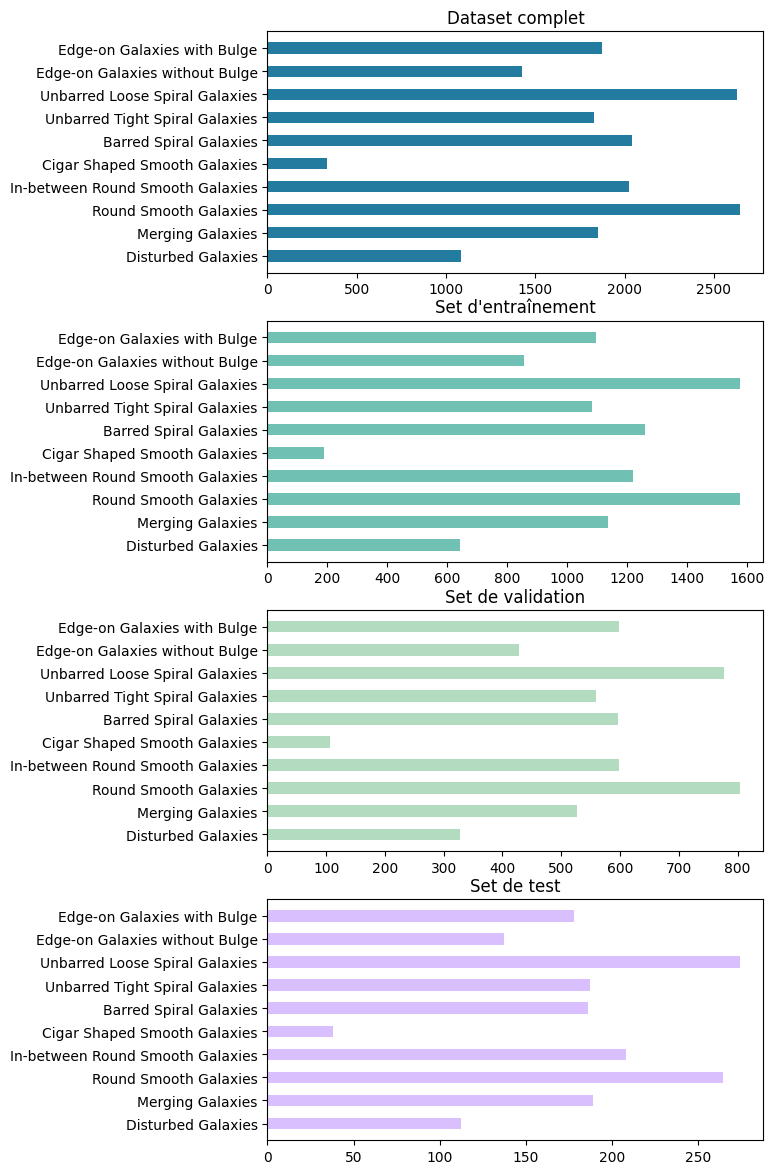

In [70]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize = (6.4, 4.8 * 3))
axes_names = ["Dataset complet", "Set d'entraînement", "Set de validation", "Set de test"]
colors = ["#247BA0", "#70C1B3", "#B2DBBF", "#DABFFF"]
for i, distrib in enumerate([n, train_distrib, val_distrib, test_distrib]) : 
    ax = axes[i]
    ax.barh([i for i in range(10)], width = distrib, height = 0.5, tick_label=labels_name, color=colors[i])
    ax.set_title(axes_names[i])